# 2.1 Introduction

เราจะสร้าง ML model สำหรับการทำนายราคารถยนต์มือสอง โดยใช้ข้อมูลจาก [Kaggle](https://www.kaggle.com/CooperUnion/cardataset)

Outline:
- Data preparation
- Exploratory data analysis
- Linear regression
- Evaluting the model with RMSE
- Feature engineering
- Regularization

Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# ทำให้แสดงกราฟใน jupyter notebook ได้
%matplotlib inline

# 2.2 Data preparation

Download ข้อมูล สำหรับคนที่ยังไม่มีข้อมูล

> `#` คือ comment ใช้อธิบาย แต่ไม่ได้ execute ถ้าอยากจะ excute code ให้ลบ `#` ออก

In [2]:
# URL = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
# df = pd.read_csv(URL)
# df.to_csv("data/car_price.csv", index=False)

นำเข้าข้อมูล เพื่อประมวณผล

In [3]:
df = pd.read_csv("data/car_price.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
# ดูขนาดของ data frame ด้วย attribute shape
df.shape

(11914, 16)

In [5]:
# ดูข้อมูล 5 แถวแรก ด้วย method head
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# ดูข้อมูล 5 แถวแรก ด้วย method tail
df.tail(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
# ดูชื่อ column ด้วย attribute columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
# เปลี่ยนชื่อตัวแปร ให้เป็น snake_case (ตัวเล็ก และ คั่นด้วย _)
df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
# save ทับ
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
# เลือกเฉพาะ columns ที่เป็น string (object)
# ตรวจสอบด้วย attribute dtypes
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
# สร้างตัวแปรที่เก็บข้อมูล column ที่เป็น string (ข้อความ)
string_columns = list(df.columns[df.dtypes == 'object'])

In [12]:
# แก้ไขข้อมูลในตัวแปรที่เป็นข้อความ ให้เป็น snake_case
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# 2.3 Exploratory data analysis (EDA)

เป็นขั้นตอนทำความเข้าใจข้อมูล เช่น การกระจายของข้อมูล การแจกแจงความถี่ ความสัมพันธ์ เป็นต้น

เครื่องมือช่วย

- Descriptive Statistics
- Data Visualization

อันดับแรกต้องรู้ว่าข้อมูลประเภทอะไร

- Numerical Variable
- Categorial Variable

เริ่มวิเคราะห์ 1 ตัวแปรก่อน แล้ววิเคราะห์ความสัมพันธ์ระหว่างตัวแปร

Numerical 1 ตัวแปร

- ค่าทางสถิติต่างๆ เช่น min, max, mean, median, IQR, skewness, kurtosis, etc.
- การกระจาย เช่น histogram, boxplot, densitiy plot
- missing

Categorial 1 ตัวแปร

- จำนวน unique
- ตารางแจกแจงความถี่
- bar plot
- missing

## Numerical Variable

In [13]:
df_num = df.select_dtypes(include=['float64', 'int64'])

In [14]:
df_num.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


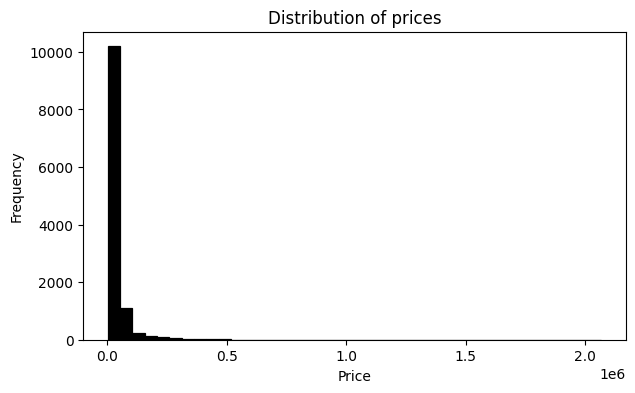

In [15]:
# ดู histogram การกระจายของข้อมูลราคา
plt.figure(figsize=(7, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

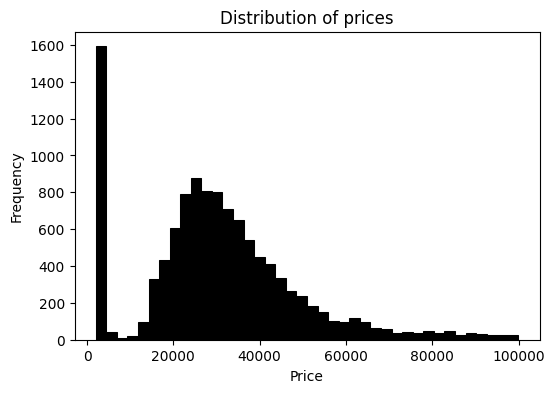

In [16]:
# ราคามีการแจกแจงที่ไม่ normal  
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

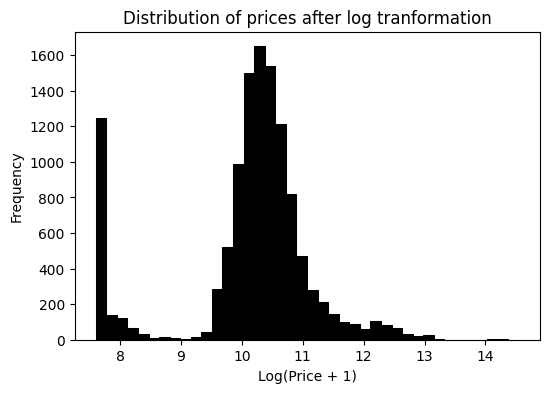

In [17]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

## Categorial Variables

In [18]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head(2)

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible


In [19]:
df_cat.isnull().sum()

make                    0
model                   0
engine_fuel_type        3
transmission_type       0
driven_wheels           0
market_category      3742
vehicle_size            0
vehicle_style           0
dtype: int64

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [21]:
df.make.nunique()

48

In [22]:
df.make.value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

> Bonus: EDA packages [link](https://towardsdatascience.com/3-python-libraries-for-effective-eda-that-you-might-have-missed-3320f48ff070)
> - SweetViz: compare
> - DataPrep: interactive
> - Skimpy light weight

# 2.4 Validation framework

เป็นการแบ่งข้อมูล ออกเป็นชุดๆ เพื่อใช้ในการทดสอบความแม่นยำของแบบจำลองและป้องกันปัญหา overfitting
โดยในบทนี้จะการทำ hold-out validation และในสัปดาห์ 4 จะพูดถึงการทำ cross-validation

ในการทำ hold-out validation จะแบ่งออกเป็น 3 ชุด

- Test Set (ร้อยละ 20)
- Validation Set (ร้อยละ 20)
- Train Set (ร้อยละ 60)

> สัดส่วนแล้วแต่ความเหมาะสม ไม่มีข้อกำหนดตายตัว

ขั้นตอนในการทำคือ

- Train แบบจำลอง
    - กำหนด hyperparameter ต่างๆ ที่ต้องการทดสอบ
    - train แบบจำลอง ของ hyperparameter ต่างๆ โดยใช้ train set
    - ใช้แบบจำลองที่ได้ predict ข้อมูล validation set
    - ทดสอบความแม่นยำด้วย validation set
    - เปรียบเทียบแบบจำลองของแต่ละ hyperparameter ต่างๆ
    - ตัดสินใจเลือก hyperparameter ที่เหมาะสม
- Test แบบจำลอง
    - รวมข้อมูล train กับ validation set เรียกว่า full train set
    - train แบบจำลอง อีกครั้ง ด้วย hyperparameter ที่เลือกไว้ กับ full train
    - predict ข้อมูล test set
    - เปรียบเทียบประสิทธิภาพ (ความแม่นยำ) ของแบบจำลอง ระหว่าง validation และ test set
    - ถ้าแตกต่างกันไม่มาก แสดงว่าแบบจำลองใช้ได้ พร้อมนำไปใช้งานจริง
    - ใช้งานจริงอาจจะ retrain ใหม่กับ full dataset ก็ได้


In [23]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [24]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [25]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [26]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [27]:
# แยก target ออกจาก features
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

# transform ข้อมูล ด้วย np.log1p
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# ลบ target ออกจาก df เพื่อป้องกัน data leak
## ใช้ drop method ต้อง save ทับ
df_train = df_train.drop(columns=['msrp'])
df_val = df_val.drop(columns=['msrp'])
df_test = df_test.drop(columns=['msrp'])
## ใช้ del keyword
# del df_train['msrp']
# del df_val['msrp']
# del df_test['msrp']

# 2.5 Linear regression

Linear regression เป็นการหาสมการเส้นตรง เพื่ออธิบายตัวแปร target (y) โดยใช้ตัวแปรอธิบาย X มีความสัมพันธ์เป็นเส้นตรง เช่น

$$
y_i = g(x_i)\\
y_i = w_0 + w_1 x_{1i} + w_2 x_{2i} + ... + w_n x_{ni}\\
y_i = w_0 + \sum_{j=1}^{n} w_{ij} x_{ij}
$$

โดยที่

- $y$ คือ target เช่น ราคารถยนต์
- $x_1 ... x_n$ คือ features เช่น ผู้ผลิต ปี จำนวนแรงม้า เป็นต้น
- $w_0$ คือ bias หรือ intercept
- $w_1 ... w_n$ คือ weight หรือ slope
- $n$ คือ จำนวน feature
- $i$ คือ ข้อมูลแถวที่ $i$

เป้าหมาย คือ การหาค่า $w_0 ... w_n$ ที่ทำให้เราสามารถทำนาย $y$ ได้ใกล้เคียงที่สุด ซึ่งมีหลายวิธี และ Linear regression เป็นวิธีหนึ่ง

> สำหรับคนที่เรียนสถิติ/เศรษฐมิติ วิธีนี้ก็คือ Ordinary Least Square

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [29]:
# toy example
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

def linear_regression(xi):
    n = len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

linear_regression(xi)

12.312

In [30]:
np.expm1(linear_regression(xi))

222347.2221101062

# 2.6 Linear regression: vector form

ในบทที่แล้วเป็นการแสดงการคำนวณของ 1 แถว แต่เรามีข้อมูลมากกว่า 1 แถว ดังนั้นจึงขียนเป็น matrix

$$
\textbf{y} = g(\textbf{X})\\
\textbf{y} = \textbf{X}^T \textbf{w}
$$

# 2.7 Linear regression: normal equation

โจทย์ คือ ต้องการหา $\textbf{w}$ ซึ่งสามารถทำได้โดย

$$
\textbf{X} \textbf{w} = \textbf{y}\\
\textbf{X}^T \textbf{X} \textbf{w} = \textbf{X}^T \textbf{y}\\
(\textbf{X}^T \textbf{X}^T)^{-1} (\textbf{X}^T \textbf{X}) \textbf{w} = (\textbf{X}^T \textbf{X}^T)^{-1} \textbf{X}^T \textbf{y}\\
\textbf{w} = (\textbf{X}^T \textbf{X}^T)^{-1} \textbf{X}^T \textbf{y}\\
$$

In [31]:
# function ในการหาค่า parameter ด้วยวิธี linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# 2.8 Baseline model

แบบจำลองตั้งต้น baseline ใช้ตัวแปร

- engine_hp
- engine_cylinders
- highway_mpg
- popularity

In [32]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [33]:
# helper function สำหรับเตรียมข้อมูลเข้าแบบจำลอง
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
# train model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [35]:
# result
w_0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [36]:
# prediction
y_pred = w_0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

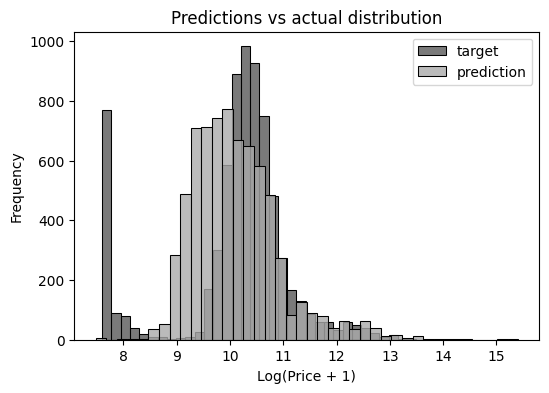

In [37]:
# visualize เทียบค่าทำนายกับค่าจริง
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# 2.9 Root Mean Squared Error

การวัดประสิทธิภาพ หรือ ความแม่นยำของแบบจำลอง มีหลายวิธี ขึ้นอยู่กับประเภทของตัวแปร target ด้วย ในกรณีของตัวแปร numerical/continuous มีหลายวิธี เช่น

- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Mean Percentage Absolute Error (MAPE)

ในบทนี้ใช้ RMSE โดย RMSE มีข้อดีคือ จะลงโทษค่าคลาดเคลื่อนที่ห่าง เพราะมีการยกกำลังสอง

$$
error_{i} = y_i - g(x_i)\\
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (error_i)^2}\\
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |error_i|\\
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \frac{|error_i|}{y_i}
$$

In [38]:
# วัดค่าความคลาดเคลื่อนด้วย rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# 2.10 RMSE on validation set

ในการวัดความแม่นยำ เราต้องวัดกับข้อมูลคนละชุดกับข้อมูลที่ใช้ train ในขั้นนี้ ทดสอบความแม่นยำกับ validation set

In [39]:
# rmse กับข้อมูล training set
rmse(y_train, y_pred)

0.7554192603920132

In [40]:
# ทดสอบกับ validation set
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130156

# 2.11 Feature Engineering

Feature Engineering เป็นขั้นตอนในการสร้าง feature ใหม่ๆ จากข้อมูลตั้งต้น ซึ่ง feature ใหม่ สามารถใช้เพิ่มความแม่นยำของการพยากรณ์ได้

ในส่วนนี้จะเพิ่มตัวแปร ที่เป็นอายุของรถ โดยมีสมมติฐานว่า รถใหม่จะมีราคาขายรถมือสองที่สูงกว่า

In [41]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
# train กับ features ใหม่
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# rmse train
y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

# rmse validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058299


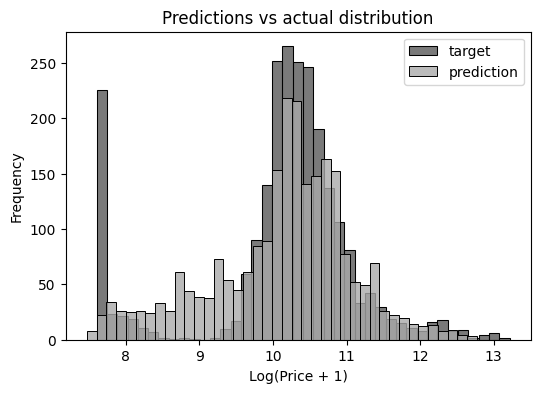

In [43]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# 2.12 Categorial Variables

ในบทนี้เป็นการใช้ประโยชน์ข้อมูล categorial เช่น ผู้ผลิต

วิธีการ ต้องแปลงข้อมูล categorial เป็นตัวเลข โดยใช้เทคนิค dummy variable หรือ one-hot coding
กล่าวคือ สร้างตัวแปรของผู้ผลิตแต่ละผู้ผลิต โดย 1 = เป็นรถยนต์ที่ผู้ผลิตนั้น และ 0 = ไม่ใช่

In [44]:
df['number_of_doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [45]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [46]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.50760388495567


In [48]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [49]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.47482567372234724


In [51]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [52]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [53]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924003
validation: 0.46858791946585304


In [54]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [55]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [56]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [57]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [58]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 66.41939130116644
validation: 49.873533583264866


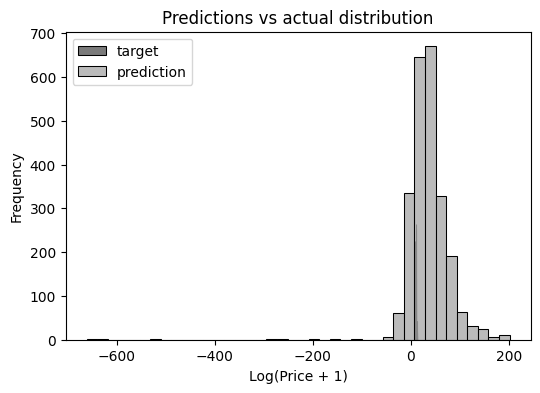

In [60]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

> การเพิ่มตัวแปรไปเรื่อยๆ ไม่ได้หมายความว่า แบบจำลองจะมีความแม่นยำมากขึ้น

# 2.13 Regularization

ปัญหาหนึ่งที่อาจเกิดขึ้นได้ คือ

- ไม่สามารถหา inverse ของ (X^TX) ไม่ได้ Singular Matrix คือ มีบาง column ที่มีความสัมพันธ์กันเชิงเส้น
- แต่ในการทำ numerical computation เลขที่ใช้เป็นทศนิยม ทำให้ยังสามารถ inverse ได้ทั้งที่ไม่ควร

วิธีแก้ไข คือ การเพิ่มตัวเลขใน diaganal เพื่อให้โอกาสที่จะเกิดความสัมพันธ์เชิงเส้นเป็นไปได้ยากขึ้น
วิธีที่นี้เรียกว่า **Regularization**

In [61]:
# ตัวอย่าง singular matrix
XTX = [
  [1, 2, 4],
  [2, 1, 2],
  [2, 1, 2]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [62]:
# inverse ของ matrix ที่ค่ามีความคลาดเคลื่อนเล็กน้อย
XTX = [
  [1, 2, 4.000001],
  [2, 1, 2],
  [2, 1.000001, 2]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333222e-01,  8.33333222e-01, -1.66666611e-01],
       [-2.95874436e-11, -1.00000000e+06,  1.00000000e+06],
       [ 3.33333222e-01,  4.99999667e+05, -4.99999833e+05]])

In [63]:
# 
alpha = np.eye(3) * 0.01
XTX = [
  [1, 2, 4],
  [2, 1, 2],
  [2, 1, 2]
]
XTX = np.array(XTX) + alpha
np.linalg.inv(XTX)

array([[ -0.33594125,   0.22321678,   0.44643355],
       [  0.22321678,  66.62909184, -66.74181631],
       [  0.22321678, -33.37090816,  33.25818369]])

In [64]:
def train_linear_regression_reg(X, y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [65]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4643444223655399
validation: 0.4603700695878582


In [66]:
# we can change r
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4797496545423125
validation: 0.47572481006945594


# 2.14 Tuning the model

จากการทำ regularization ผลลัพธ์ที่ได้ แตกต่างกันไปตามค่า ของ `r` ซึ่ง `r` ก็คือ hyperparameter ของ linear regression

แล้วเราจะเลือกค่า `r` อย่างไร
> ใช้วิธี Grid Search หาค่าที่เหมาะสม โดย train กับ train set และ วัดผลกับ validation set

In [67]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
res = dict()

for r in [0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  res[r] = rmse(y_val, y_pred)

res

{0.0: 49.873533583264866,
 1e-05: 0.46022537167467836,
 0.0001: 0.46022549097944854,
 0.001: 0.46022676259116185,
 0.01: 0.46023949631165534,
 0.1: 0.4603700695878582,
 1: 0.46182980426553016,
 10: 0.47572481006945594}

In [68]:
r_best = min(res, key=res.get)
r_best

1e-05

# 2.15 Using the model

เมื่อได้ hyperparameter แล้ว เราพร้อมสำหรับทดสอบกับ test set

- รวมข้อมูล train กับ validation
- retrain model อีกครั้งกับข้อมูลที่รวมกัน (full train)
- ทดสอบความแม่นยำกับ test set คาดหวังว่าจะให้ค่าที่ไม่แตกต่างกัน

In [69]:
df_fulltrain = pd.concat([df_train, df_val]).reset_index(drop=True)
df_fulltrain

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [70]:
X_fulltrain = prepare_X(df_fulltrain)
y_fulltrain = np.concatenate([y_train, y_val])

In [71]:
# we can change r
X_fulltrain = prepare_X(df_fulltrain)
w_0, w = train_linear_regression_reg(X_fulltrain, y_fulltrain, r=r_best)

y_pred = w_0 + X_fulltrain.dot(w)
print('train:', rmse(y_fulltrain, y_pred))

X_val = prepare_X(df_test)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_test, y_pred))

train: 0.46289480918119164
validation: 0.4561519402396736


In [72]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 9208, dtype: object

In [73]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [74]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [75]:
X_small = prepare_X(df_small)

In [76]:
y_pred = w_0 + X_small.dot(w)
np.expm1(y_pred[0])

33836.950010514745

In [77]:
np.expm1(y_test[20])

35000.00000000001